<a href="https://colab.research.google.com/github/OSVHdez0/Desarrollo-Gu-a-3-PCD/blob/main/Gu%C3%ADa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guía 3**

## **¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

Estudiante: Oscar Santiago Villamizar Hernández
ID: 36739

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Overview de la data

Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

In [50]:
# Solución propuesta

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/sample_data/accidents-1.csv', sep=';')

df[df.isnull()] # Filtrar filas con valores faltantes

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#Imputacion para columnas LATITUDE y LONGITUDE
df['LATITUDE'] = df['LATITUDE'].fillna(df.groupby('BOROUGH')['LATITUDE'].transform('mean'))
df['LONGITUDE'] = df['LONGITUDE'].fillna(df.groupby('BOROUGH')['LONGITUDE'].transform('mean'))

#Imputacion para ON STREET NAME
df['ON STREET NAME'] = df['ON STREET NAME'].fillna('UNKNOWN')

#Imputacion para CONTRIBUTING FACTOR VEHICLE X
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified')
df['CONTRIBUTING FACTOR VEHICLE 2'] = df['CONTRIBUTING FACTOR VEHICLE 2'].fillna('Unspecified')
df['CONTRIBUTING FACTOR VEHICLE 3'] = df['CONTRIBUTING FACTOR VEHICLE 3'].fillna('Unspecified')
df['CONTRIBUTING FACTOR VEHICLE 4'] = df['CONTRIBUTING FACTOR VEHICLE 4'].fillna('Unspecified')
df['CONTRIBUTING FACTOR VEHICLE 5'] = df['CONTRIBUTING FACTOR VEHICLE 5'].fillna('Unspecified')

#Imputacion para VEHICLE TYPE CODE X
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].fillna('Unknown')
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].fillna('Unknown')
df['VEHICLE TYPE CODE 3'] = df['VEHICLE TYPE CODE 3'].fillna('Unknown')
df['VEHICLE TYPE CODE 4'] = df['VEHICLE TYPE CODE 4'].fillna('Unknown')
df['VEHICLE TYPE CODE 5'] = df['VEHICLE TYPE CODE 5'].fillna('Unknown')

df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,UNKNOWN,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,3988123,Sedan,Unknown,Unknown,Unknown,Unknown
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,3987962,Sedan,Unknown,Unknown,Unknown,Unknown
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,UNKNOWN,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,4193132,Sedan,Unknown,Unknown,Unknown,Unknown
3,09/23/2018,13:10,QUEENS,11367.0,40.651768,-73.709991,MAIN STREET,0,0,1,...,Unspecified,Unspecified,Unspecified,Unspecified,3985962,Bike,Station Wagon/Sport Utility Vehicle,Unknown,Unknown,Unknown
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,UNKNOWN,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,4192111,Sedan,Sedan,Unknown,Unknown,Unknown


### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [ ] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [x] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [x] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [ ] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [x] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [ ] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

### **Sigamos adelante y respondamos a cada una de las preguntas del cliente.**

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


<ipython-input-68-3670f59dcc97>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


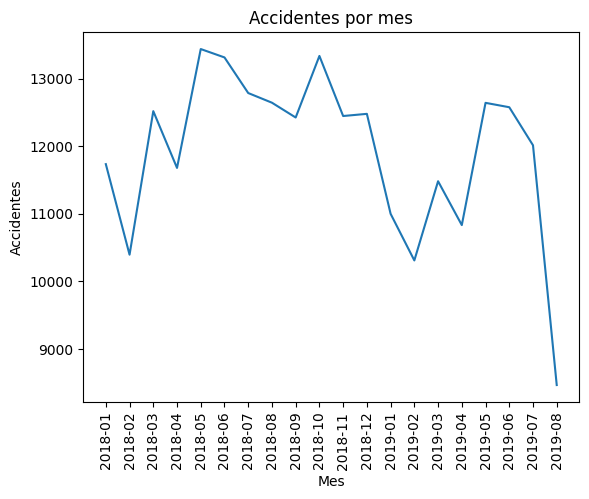

In [68]:
# Solución propuesta
df['DATE'] = pd.to_datetime(df['DATE'])
df['MONTH'] = df['DATE'].dt.to_period('M')
df.head()

df_datos_mes = df.groupby('MONTH').size().reset_index(name='COUNT')
df_datos_mes['MONTH'] = df_monthly['MONTH'].astype(str)

plot = sns.lineplot(x='MONTH', y='COUNT', data=df_monthly,)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title('Accidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Accidentes')
plt.show()


El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

- Los meses que tienen el menor numero de accidentes son febrero(2018 y 2019) y julio y agosto (2019).
- Puede deberse a una menor circulación de vehiculos ya sea por la temporada.

### Exjercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

<ipython-input-71-00f243b27b17>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['HOUR'] = pd.to_datetime(df['TIME']).dt.hour


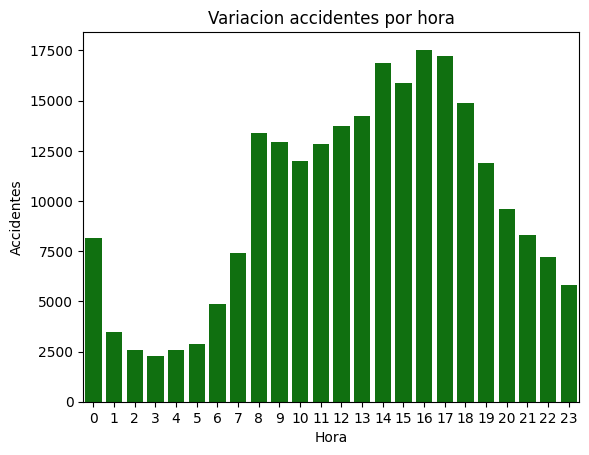

In [71]:
# Solución propuesta

df['HOUR'] = pd.to_datetime(df['TIME']).dt.hour
df_hora = df.groupby('HOUR').size().reset_index(name='COUNT')

plot = sns.barplot(x='HOUR', y='COUNT', data=df_hora, color='green')
plt.title('Variacion accidentes por hora')
plt.xlabel('Hora')
plt.ylabel('Accidentes')
plt.show()

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?
- El tener el enfoque de los accidentes segun su hora nos es util para saber en que horario suelen haber mas o menos accidentes, en este caso se puede observar que hay un incremente de los accidentes en lo que sería la 'hora pico'.

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

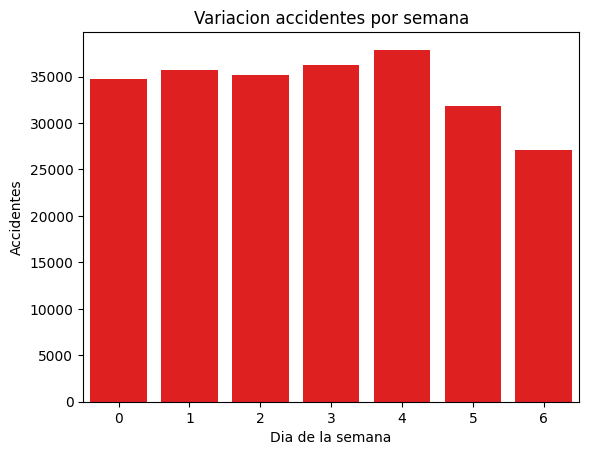

In [75]:
# Solución propuesta

df['DAY_OF_WEEK'] = pd.to_datetime(df['DATE']).dt.weekday
df_dia_semana = df.groupby('DAY_OF_WEEK').size().reset_index(name='COUNT')

plot = sns.barplot(x='DAY_OF_WEEK', y='COUNT', data=df_dia_semana, color='red')
plt.title('Variacion accidentes por semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Accidentes')
plt.show()

### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

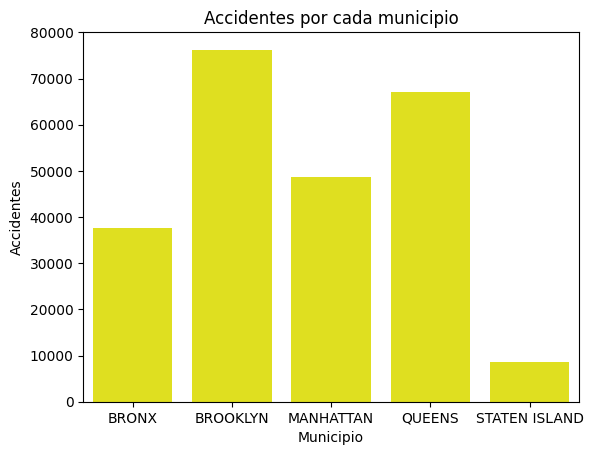

In [78]:
# Solución propuesta

df_accidentes_por_municipio = df.groupby('BOROUGH').size().reset_index(name='COUNT')
df_accidentes_por_municipio

plot = sns.barplot(x='BOROUGH', y='COUNT', data=df_accidentes_por_municipio, color='yellow')
plt.title('Accidentes por cada municipio')
plt.xlabel('Municipio')
plt.ylabel('Accidentes')
plt.show()


Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

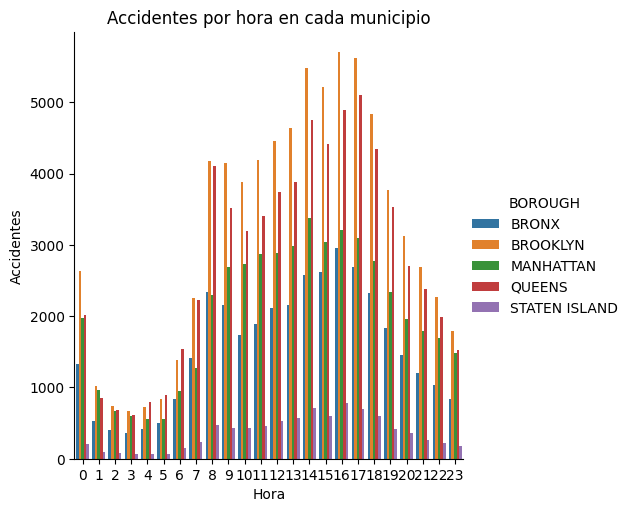

In [91]:
# Solución propuesta

df_accidentes_por_hora = df.groupby(['BOROUGH', 'HOUR']).size().reset_index(name='COUNT')
df_accidentes_por_hora

plot = sns.catplot(x='HOUR', y='COUNT', hue='BOROUGH', data=df_accidentes_por_hora, kind='bar')
plt.title('Accidentes por hora en cada municipio')
plt.xlabel('Hora')
plt.ylabel('Accidentes')
plt.show()
#sns.FacetGrid(df_accidentes_por_hora, col='BOROUGH', hue='HOUR', col_wrap=3)

**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**
- Aunque la cantidad de accidentes entre municipios puede variar significativamente, tambien se puede observar que el pico de accidentes para cada municipio suele estar en el mismo rango de horas.

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

<ipython-input-139-343b452f8094>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


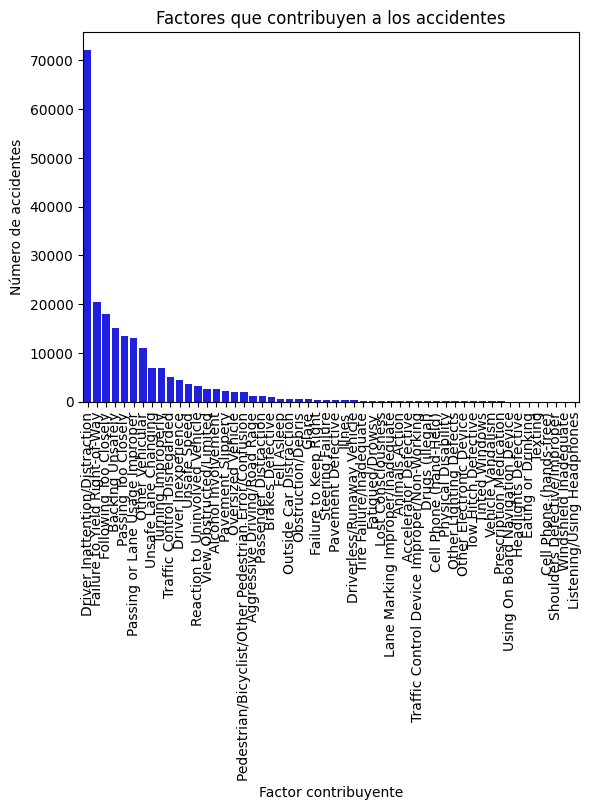

In [139]:
# Solución propuesta

factores_contribuyen = pd.concat([df['CONTRIBUTING FACTOR VEHICLE 1'], df['CONTRIBUTING FACTOR VEHICLE 2'], df['CONTRIBUTING FACTOR VEHICLE 3'], df['CONTRIBUTING FACTOR VEHICLE 4'],df['CONTRIBUTING FACTOR VEHICLE 5']]).reset_index(drop=True)

#Se eliminan los valores nulos de las columanas de factores contribuyentes
contributing_factors = factores_contribuyen[factores_contribuyen != 'Unspecified']
contributing_factors = contributing_factors.dropna()

conteo_factores = contributing_factors.value_counts().reset_index(name='COUNT')
conteo_factores.rename(columns={'index': 'CONTRIBUTING_FACTOR'}, inplace=True)

plot = sns.barplot(x='CONTRIBUTING_FACTOR', y='COUNT', data=conteo_factores, color='blue')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title('Factores que contribuyen a los accidentes')
plt.xlabel('Factor contribuyente')
plt.ylabel('Número de accidentes')
plt.show()

### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

<ipython-input-162-05653cac1c0a>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90);
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


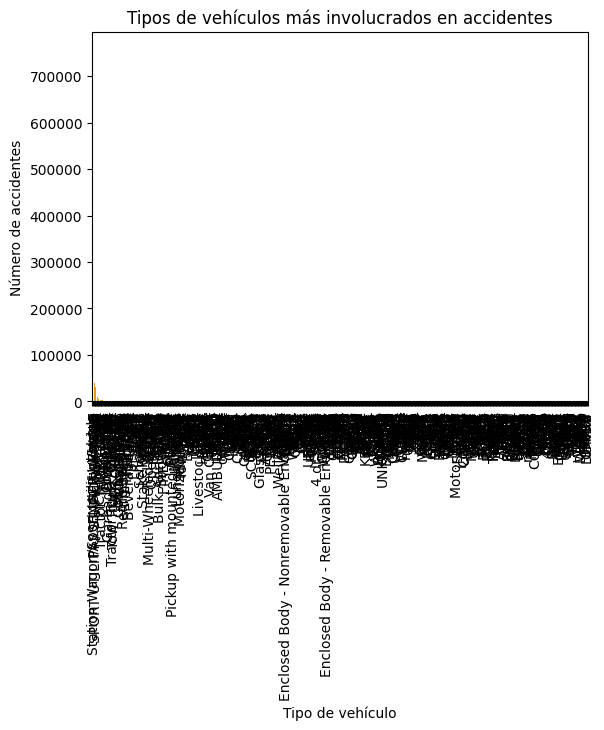

In [162]:
# Solución propuesta
df_vehiculos = pd.concat([df['VEHICLE TYPE CODE 1'], df['VEHICLE TYPE CODE 2'], df['VEHICLE TYPE CODE 3'], df['VEHICLE TYPE CODE 4'],df['VEHICLE TYPE CODE 5']]).reset_index(drop=True)
df_vehiculos = df_vehiculos.dropna();

conteo_vehiculos = df_vehiculos.value_counts().reset_index(name='COUNT');
conteo_vehiculos.rename(columns={'index': 'VEHICLE TYPE CODE'}, inplace=True);

plot = sns.barplot(x='VEHICLE TYPE CODE', y='COUNT', data=conteo_vehiculos, color='orange');
plot.set_xticklabels(plot.get_xticklabels(), rotation=90);
plt.title('Tipos de vehículos más involucrados en accidentes');
plt.xlabel('Tipo de vehículo');
plt.ylabel('Número de accidentes');
plt.show();

### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [ ] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [x] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

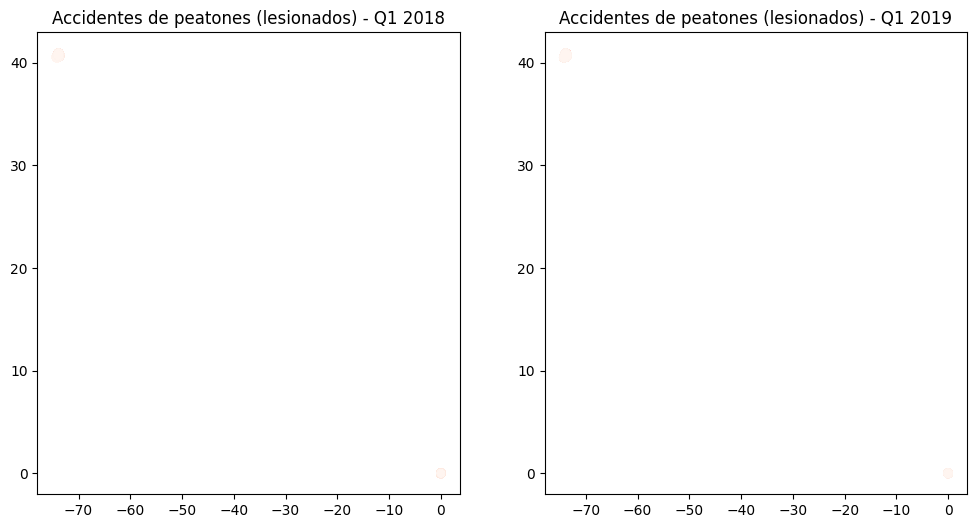

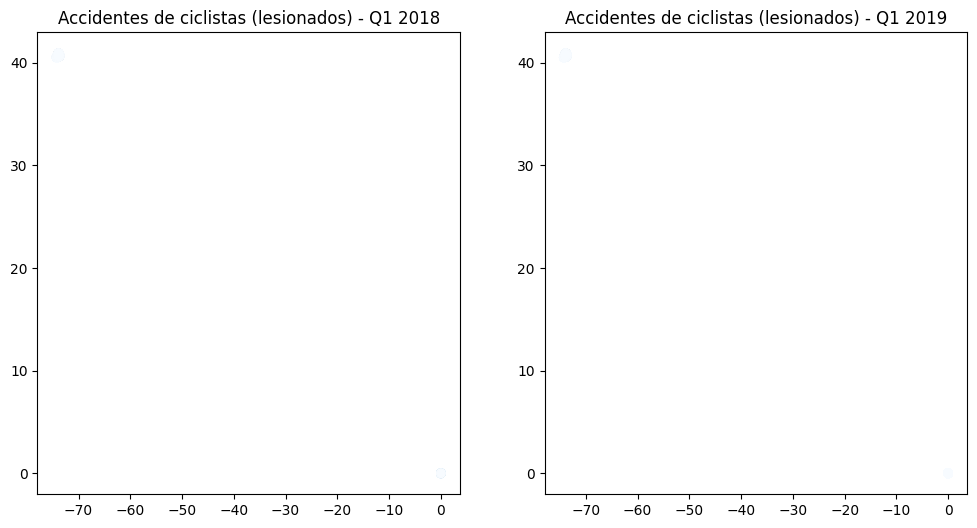

In [160]:
# Solución propuesta

#Datos primer semestre 2018 y 2019
df_2018_q1 = df[(df['DATE'] >= '2018-01-01') & (df['DATE'] <= '2018-03-31')]
df_2019_q1 = df[(df['DATE'] >= '2019-01-01') & (df['DATE'] <= '2019-03-31')]

#Mapa de calor para accidentes con peatones
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_2018_q1['LONGITUDE'], df_2018_q1['LATITUDE'], c=df_2018_q1['NUMBER OF PEDESTRIANS INJURED'], cmap='Reds')
plt.title('Accidentes de peatones (lesionados) - Q1 2018')

plt.subplot(1, 2, 2)
plt.scatter(df_2019_q1['LONGITUDE'], df_2019_q1['LATITUDE'], c=df_2019_q1['NUMBER OF PEDESTRIANS INJURED'], cmap='Reds')
plt.title('Accidentes de peatones (lesionados) - Q1 2019')
plt.show()

# Mapa de calor par accidentes con ciclistas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# Access the column with the correct name, ensuring no extra spaces
plt.scatter(df_2018_q1['LONGITUDE'], df_2018_q1['LATITUDE'], c=df_2018_q1['NUMBER OF CYCLIST INJURED'], cmap='Blues')
plt.title('Accidentes de ciclistas (lesionados) - Q1 2018')

plt.subplot(1, 2, 2)
# Access the column with the correct name, ensuring no extra spaces
plt.scatter(df_2019_q1['LONGITUDE'], df_2019_q1['LATITUDE'], c=df_2019_q1['NUMBER OF CYCLIST INJURED'], cmap='Blues')
plt.title('Accidentes de ciclistas (lesionados) - Q1 2019')
plt.show()


### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

<ipython-input-165-7a1cc126f765>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vehicle Type', y='Deaths', data=vehiculos_principales, palette='viridis')


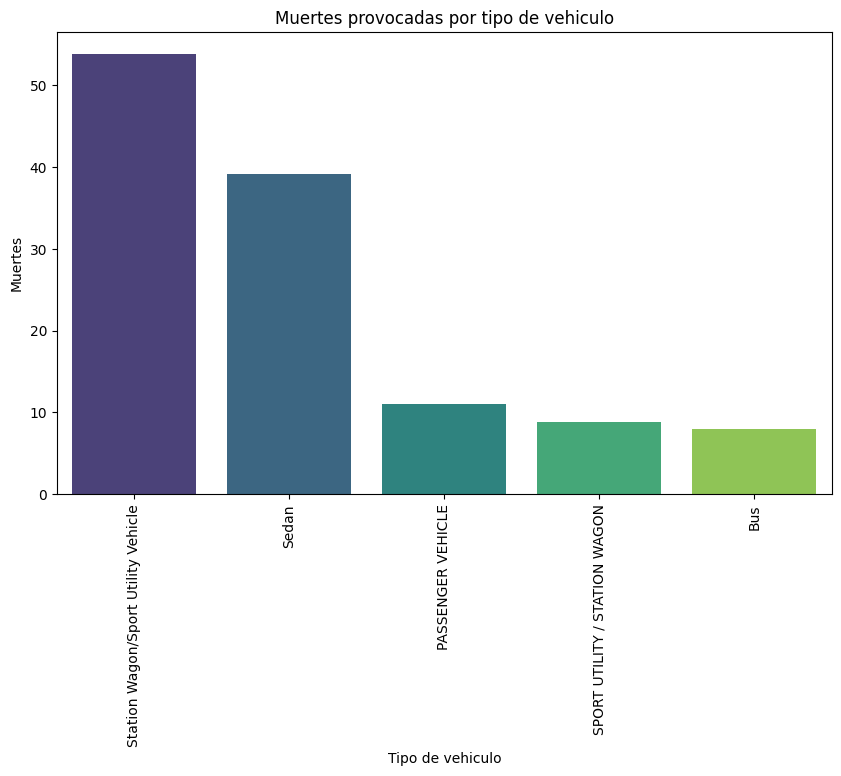

In [165]:
# Solución propuesta

df['TOTAL_DEATHS'] = df[['NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED']].sum(axis=1)


def calculo_muertes_vehiculo(row):
    muertes = row['TOTAL_DEATHS']
    vehiculos = [row[f'VEHICLE TYPE CODE {i}'] for i in range(1, 6)]
    vehiculos = [v for v in vehiculos if v != 'Unknown' and pd.notnull(v)]
    if len(vehiculos) > 0 and muertes > 0:
        muertes_vehiculo = muertes / len(vehiculos)
        for vehiculos in vehiculos:
            return vehiculos, muertes_vehiculo
    return None, 0


# Crear nuevo DF
muertes_vehiculo = df.apply(calculo_muertes_vehiculo, axis=1).tolist()
muertes_vehiculo_df = pd.DataFrame(muertes_vehiculo, columns=['Vehicle Type', 'Deaths'])
muertes_vehiculo_df = muertes_vehiculo_df[muertes_vehiculo_df['Vehicle Type'].notna()]

muertes_vehiculo_agrupado = muertes_vehiculo_df.groupby('Vehicle Type')['Deaths'].sum().reset_index()

vehiculos_principales = muertes_vehiculo_agrupado.sort_values(by='Deaths', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle Type', y='Deaths', data=vehiculos_principales, palette='viridis')
plt.title('Muertes provocadas por tipo de vehiculo')
plt.xlabel('Tipo de vehiculo')
plt.ylabel('Muertes')
plt.xticks(rotation=90)
plt.show()